In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

#### Let's load the Nashville zipcode data and look at the first few rows
- geopandas reads files with the `read_file()` method
- The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku


In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [3]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

#### Now let's look at the difference between calling the first geometry variable.....


In [4]:
print(zipcodes.loc[0, 'geometry'])

MULTIPOLYGON (((-86.68724897141 36.318212121092, -86.687216475338 36.318210560887, -86.687181702435 36.318208780693, -86.687146962761 36.318206917893, -86.687112187256 36.318205000347, -86.687077445444 36.318202972151, -86.687042702928 36.318200862685, -86.687034690751 36.318200362824, -86.687007959928 36.318198697129, -86.68697325063 36.318196422067, -86.686938539918 36.318194065167, -86.686903827781 36.318191625285, -86.68686914958 36.318189102792, -86.686834437433 36.318186498074, -86.6867997571 36.318183810757, -86.686765111412 36.318181040826, -86.686730430357 36.318178188106, -86.686695782299 36.318175225883, -86.68666116771 36.318172208522, -86.686626552408 36.318169108746, -86.686591935688 36.318165926561, -86.686557318725 36.318162634491, -86.686522735235 36.318159287854, -86.686488151499 36.318155830759, -86.686453600524 36.318152318529, -86.68641904813 36.31814872389, -86.68638449549 36.318145018792, -86.686349976324 36.318141259129, -86.68631549015 36.318137389391, -86.6862

#### ...and printing it


#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


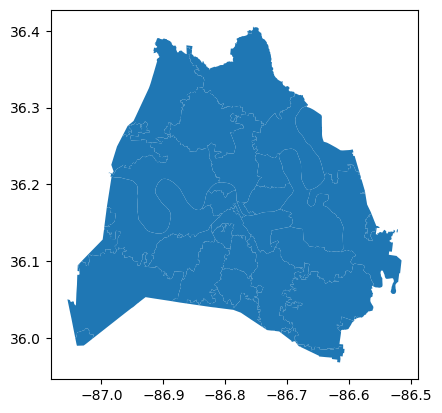

In [5]:
zipcodes.plot();

#### Add information and styling 
- set the `column =` to a column in the GeoDataFrame to color by
- change the [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
- pass in keywords to tweak the legend created by [`matplotib`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)


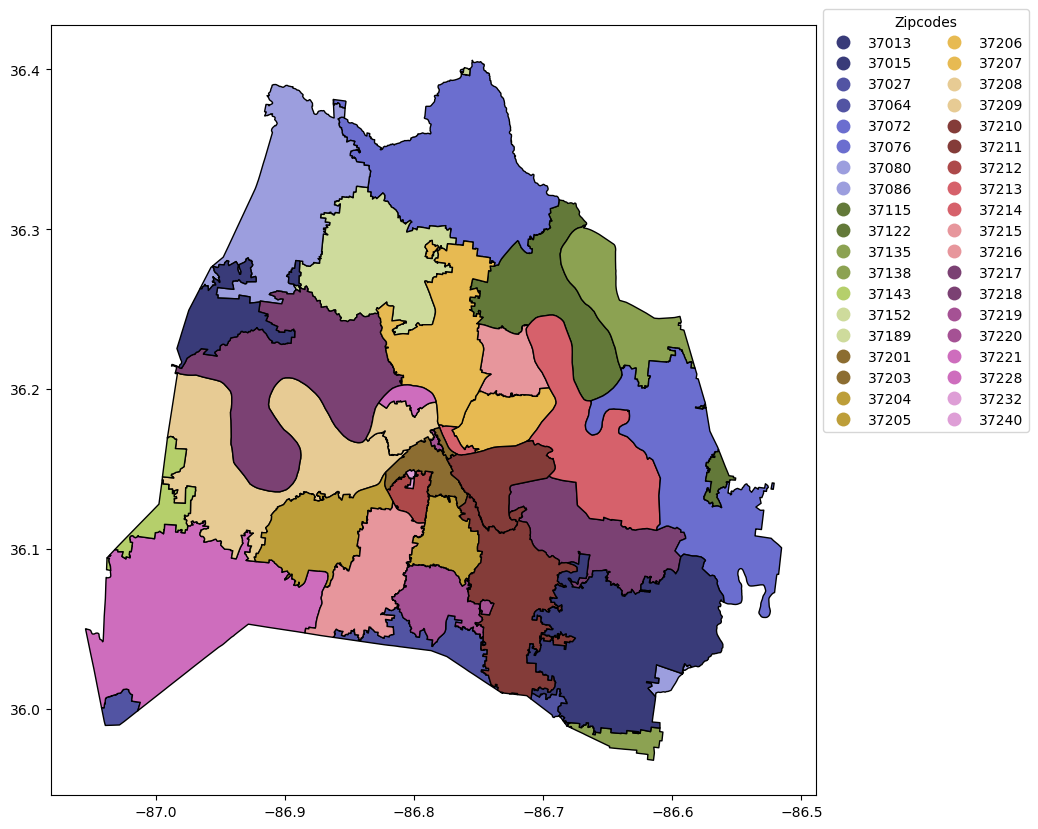

In [6]:
#geopandas will take care of legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'tab20b')
plt.show()

#### Next you will read in the bus stop data
- downloaded from https://data.nashville.gov/Transportation/Regional-Transportation-Authority-Bus-Stops/p886-fnbd
- cleaned:
    - rename columns 
    - drop unwanted columns 
    - parse `lat` and `lng` columns from `location`
- print the shape 
- take a look at the first 3 rows

In [7]:
sidewalks = gpd.read_file('../data/Sidewalks_View.geojson')
print(sidewalks.shape)
sidewalks.head(3)

(14913, 14)


,OBJECTID,RouteId,OnStreet,FromStreet,ToStreet,Side,Condition,District,DateRepaired,RepairScoreWalkNBike,SidewalkWidth,RepairConstructionCost,GlobalID,geometry
0,1,10090.0,Middlewick Ln,Caswick Ct,Parkfield Dr,S,GOOD,31,None,0.0,5,0.0,b159d381-f953-420b-81bb-3843a51661e0,"LINESTRING (-86.67378 35.98631, -86.67377 35.9..."
1,2,10440.0,Welshcrest Dr,Welshcrest Pl,Cul-De-Sac,S,GOOD,32,None,0.0,5,0.0,5657f9b5-9b78-49df-9137-615afce3746c,"LINESTRING (-86.64816 36.06858, -86.64815 36.0..."
2,3,6911.0,Old Hickory Blvd,Tom Hartley Dr,Iris Ave,E,FAIR,11,None,50.0,5.5,0.0,d2cc9e87-e3d6-4d7c-bc77-bd1cd8cf6727,"LINESTRING (-86.63702 36.24432, -86.63702 36.2..."


In [8]:
sidewalks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 14913 entries, 0 to 14912
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   OBJECTID                14913 non-null  int64   
 1   RouteId                 14907 non-null  float64 
 2   OnStreet                14913 non-null  object  
 3   FromStreet              14911 non-null  object  
 4   ToStreet                14909 non-null  object  
 5   Side                    14894 non-null  object  
 6   Condition               14151 non-null  object  
 7   District                14890 non-null  object  
 8   DateRepaired            2178 non-null   object  
 9   RepairScoreWalkNBike    12607 non-null  float64 
 10  SidewalkWidth           13638 non-null  object  
 11  RepairConstructionCost  12608 non-null  float64 
 12  GlobalID                14913 non-null  object  
 13  geometry                14901 non-null  geometry
dtypes: float64(3),

- you want the CRS for the bus stops to match the CRS in the zipcodes GeoDataFrame 


In [9]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### The `GeoDataFrame()` constructor needs 3 parameters:
 - a DataFrame
 - a coordinate reference system
 - a geometry (we will use the geopandas `points_from_xy()` method to create a Point geometry)

In [10]:
sidewalk_geo = gpd.GeoDataFrame(sidewalks, 
                           crs = zipcodes.crs, 
                           geometry = sidewalks.geometry)

In [11]:
type(sidewalk_geo)

geopandas.geodataframe.GeoDataFrame

In [12]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [13]:
sidewalks_by_zip = gpd.sjoin(sidewalk_geo, zipcodes, predicate = 'within')

In [14]:
sidewalks_by_zip.head()

,OBJECTID,RouteId,OnStreet,FromStreet,ToStreet,Side,Condition,District,DateRepaired,RepairScoreWalkNBike,SidewalkWidth,RepairConstructionCost,GlobalID,geometry,index_right,zip,po_name
1,2,10440.0,Welshcrest Dr,Welshcrest Pl,Cul-De-Sac,S,GOOD,32,None,0.0,5,0.0,5657f9b5-9b78-49df-9137-615afce3746c,"LINESTRING (-86.64816 36.06858, -86.64815 36.0...",51,37013,ANTIOCH
2,3,6911.0,Old Hickory Blvd,Tom Hartley Dr,Iris Ave,E,FAIR,11,None,50.0,5.5,0.0,d2cc9e87-e3d6-4d7c-bc77-bd1cd8cf6727,"LINESTRING (-86.63702 36.24432, -86.63702 36.2...",22,37138,OLD HICKORY
3,4,37.0,26th Ave N,Alameda St,Albion St,E,POOR,21,None,145.0,5,0.0,605aad62-aeb7-4aa9-b755-2f0dfbb32e60,"LINESTRING (-86.81630 36.16604, -86.81630 36.1...",40,37208,NASHVILLE
4,5,9646.0,Goins Rd,Nolensville Pike,Old Goins Rd,S,GOOD,30,None,0.0,5,0.0,933bb0d1-cfa5-422a-8fa5-2fae2c125fc9,"LINESTRING (-86.72442 36.07398, -86.72442 36.0...",49,37211,NASHVILLE
5,6,5936.0,Bridgepoint Dr,Creekbend Dr,Vista Ln,S,GOOD,03,None,0.0,5,0.0,0fbf918d-ea2f-4117-a7e3-79d013769437,"LINESTRING (-86.79837 36.23427, -86.79836 36.2...",42,37207,NASHVILLE


#### Now that the data is joined spatially you can count the bus stops by zip code  and see how many stops are within each polygon 
- using the `value_counts()` method


#### Let's take a closer look at the 272 bus stops in the 37207 zip code
- filter the stops_by_zip data to just get bus stops in 37207
- filter the zip code geodataframe to just the polygon (row) for 37207


In [15]:
sidewalk_37205 = sidewalks_by_zip[sidewalks_by_zip['zip'] == '37205']
sidewalk_37205.shape

(232, 17)

In [16]:
polygon37205 = zipcodes.loc[zipcodes['zip'] == '37205']
polygon37205.shape

(1, 3)

#### Now plot these two together
- first plot the polygons for 37207 and make them light green
- next plot the points for the bus stops and color them by route

In [17]:
print(polygon37205)

      zip    po_name                                           geometry
32  37205  NASHVILLE  MULTIPOLYGON (((-86.81907 36.13351, -86.81688 ...


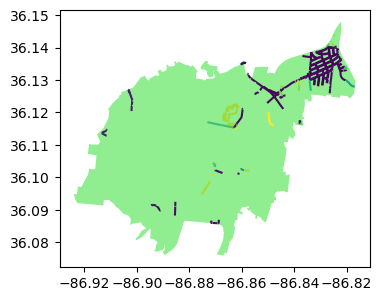

In [18]:
#fig, ax = matplotlib.subplots()
ax = polygon37205.plot(figsize = (4, 10), color = 'lightgreen')
sidewalk_37205.plot( ax = ax, column = 'RouteId');
plt.show();

#### We're getting there! It would be helpful to have streets, though wouldn't it? We can add a street map with the folium package.

#### folium maps require a center point for the street map. 
- Make use of a GeoSeries attribute (.centroid) which gives the center of a polygon
- Since there are two polygons which should we use?

In [19]:
polygon37205.geometry.centroid

C:\Users\berge\AppData\Local\Temp\ipykernel_23256\2376688767.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37205.geometry.centroid


32    POINT (-86.87327 36.11084)
dtype: geometry

In [20]:
#find the center of the larger (more southern) polygon and look at it
center = polygon37205.geometry.centroid[32]
print(center)

POINT (-86.87326928118603 36.110840405725405)


C:\Users\berge\AppData\Local\Temp\ipykernel_23256\275736139.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37205.geometry.centroid[32]


#### Folium requires a location point as an array 
- with *latitude* first
- but shapely Points have *longitude* first 

In [21]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.110840405725405, -86.87326928118603]


#### To create a folium map just call the folium `Map()` constructor
- `location` is the only argument required by the constructor
    - Set `area_center` as the `location` of the folium map. 
- `zoom_start` is an optional argument 
    - A setting of 12 should get us nice and close

In [22]:
#create our map of Nashville Zip Code 37207 and show it
map_37205 = folium.Map(location =  area_center, zoom_start = 12)
map_37205

#### Next, let's add our 37207 polygon and bus stop markers.

#### `itterows()` is a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values. 
- Below, we are printing the row values for the first 3 row as we iterate through the GeoDataFrame of bus stops in 37207. 
- This idea will be helpful for creating our markers!

In [25]:
i = 0
for row_index, row_values in sidewalk_37205.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 40
values are:
 
OBJECTID                                                                 41
RouteId                                                              5033.0
OnStreet                                                        Bowling Ave
FromStreet                                                     Richmeade Pl
ToStreet                                                        Brighton Rd
Side                                                                      W
Condition                                                              GOOD
District                                                                 24
DateRepaired                                                           None
RepairScoreWalkNBike                                                    0.0
SidewalkWidth                                                             5
RepairConstructionCost                                                  0.0
GlobalID                               d3c4e7ac-84ce-4bc5-930c

In [28]:
print(sidewalk_37205.geometry.head())

40     LINESTRING (-86.82633 36.12721, -86.82633 36.1...
86     LINESTRING (-86.82904 36.13599, -86.82904 36.1...
114    LINESTRING (-86.82772 36.13358, -86.82719 36.1...
193    LINESTRING (-86.82300 36.13732, -86.82300 36.1...
264    LINESTRING (-86.83246 36.13049, -86.83246 36.1...
Name: geometry, dtype: geometry


In [30]:
print(sidewalk_37205.geometry.geom_type.unique())

['LineString' 'MultiLineString']


In [32]:

map_center = [sidewalk_37205.geometry.centroid.y.mean(), sidewalk_37205.geometry.centroid.x.mean()]
m = folium.Map(location=map_center, zoom_start=14)

folium.GeoJson(
    sidewalk_37205,
    name="Sidewalks",
    tooltip=folium.GeoJsonTooltip(fields=["RouteId"]), 
    style_function=lambda x: {"color": "blue", "weight": 2}
).add_to(m)

m



C:\Users\berge\AppData\Local\Temp\ipykernel_23256\4216425231.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [sidewalk_37205.geometry.centroid.y.mean(), sidewalk_37205.geometry.centroid.x.mean()]


#### Create map_37207 again with additional features:
- add the zipcode area outline (polygon_37207)
- iterate through the stops_in_37207 to
    - create location from each lat and lng
    - create a popup from the stop column
    - create a custom icon if you want with [font-awesome](https://fontawesome.com/v4.7.0/icons/)
    - build a marker from each location and popup and (optionally) your custom icon 
    - add the marker to  `map_37207`
- display `map_37207`

In [24]:
#draw our zip code area: 37207
map_37205 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37205).add_to(map_37205)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in sidewalk_37205.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['RouteId'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37205)
map_37205.save('../maps/map37205.html')

#display our map
map_37205

KeyError: 'lat'

#### If you have a lot of markers, you might want to use marker clusters
- Folium has `MarkerCluster()` and `FastMarkerCluster()`
- Construct a `MarkerCluster()` 
    - construct a `MarkerCluster()` and `.add_to()` the map
    - when you loop through the data and create markers add those to the marker cluster
- Construct a `FastMarkerCluster()` by passing a list of locations

#### You can save your map as an html file and it will retain the interactive qualities

In [ ]:
folium.Map?

In [ ]:
cluster_map_37207 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37207)

folium.GeoJson(polygon37207).add_to(cluster_map_37207)

# inside the loop add each marker to the cluster
for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37207.save('../maps/cluster37207.html')

cluster_map_37207  

In [ ]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#create a list of locations and pass them to FastMarkerCluster()
locations = stops_in_37207[['lat', 'lng']].values.tolist()
map_37207.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37207